In [1]:
import cellpylib as cpl
import matplotlib.pyplot as plt
import os

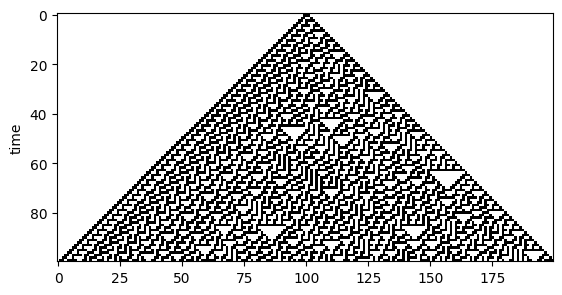

In [2]:
cellular_automaton = cpl.init_simple(200)

cellular_automaton = cpl.evolve(
    cellular_automaton,
    timesteps=100,
    memoize=True,
    apply_rule=lambda n, c, t: cpl.nks_rule(n, 30)
)

cpl.plot(cellular_automaton)

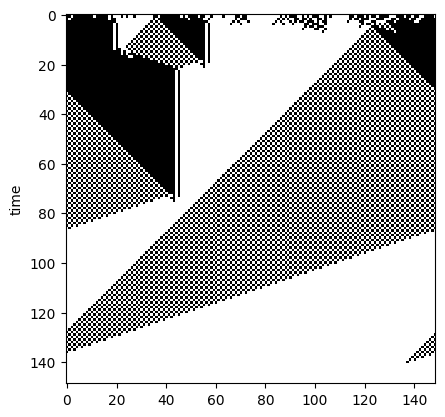

In [3]:
cellular_automaton = cpl.init_random(149)

# Mitchell et al. discovered this rule using a Genetic Algorithm
rule_number = 6667021275756174439087127638698866559

# evolve the CA, setting r to 3, for a neighbourhood size of 7
cellular_automaton = cpl.evolve(
    cellular_automaton,
    timesteps=149,
    apply_rule=lambda n, c, t: cpl.binary_rule(n, rule_number),
    r=3
)

cpl.plot(cellular_automaton)

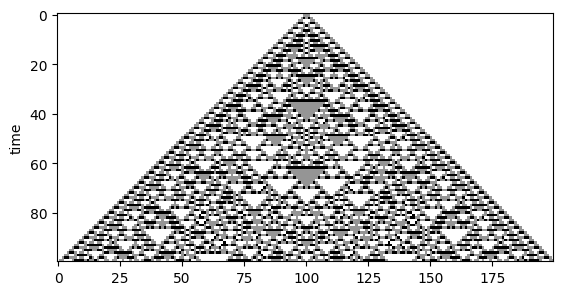

In [4]:
cellular_automaton = cpl.init_simple(200)

# evolve the CA, using totalistic rule 777 for a 3-color CA
cellular_automaton = cpl.evolve(
    cellular_automaton,
    timesteps=100,
    apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=3, rule=777)
)

cpl.plot(cellular_automaton)

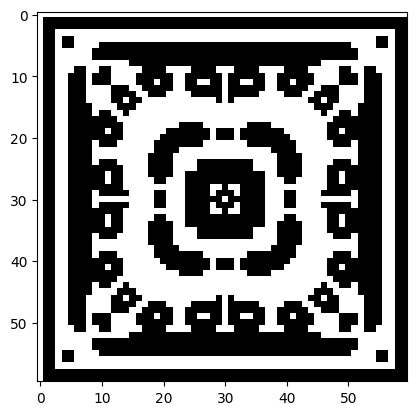

In [5]:

# initialize a 60x60 2D cellular automaton
cellular_automaton = cpl.init_simple2d(60, 60)

# evolve the cellular automaton for 30 time steps,
#  applying totalistic rule 126 to each cell with a Moore neighbourhood
cellular_automaton = cpl.evolve2d(
    cellular_automaton, 
    timesteps=30, 
    neighbourhood='Moore',
    apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=126)
)

cpl.plot2d(
    cellular_automaton,
    # timestep=10 # defaults to the last one
)

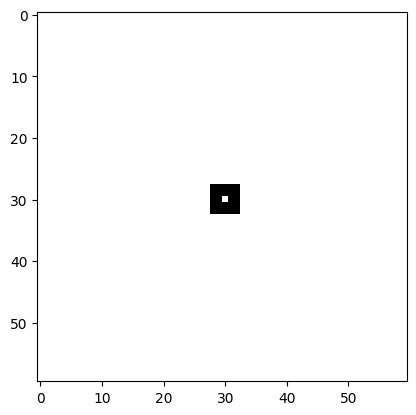

In [6]:
def show_plt(func_animation):
    func_animation.save('animation.gif', writer='imagemagick', fps=10)
    os.system('gio open animation.gif')
    return func_animation

show_plt(cpl.plot2d_animate(cellular_automaton))

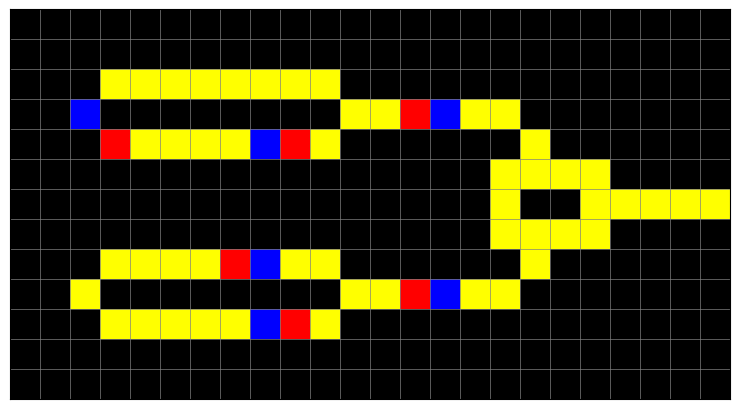

NameError: name 'show_plt' is not defined

In [2]:
import cellpylib as cpl
import numpy as np
from matplotlib.colors import ListedColormap


def wireworld_rule(n, c, t):
    current_activity = n[1][1]
    if current_activity == 0:  # empty
        return 0
    if current_activity == 1:  # electron head
        return 2
    if current_activity == 2:  # electron tail
        return 3
    if current_activity == 3:  # conductor
        electron_head_count = np.count_nonzero(n == 1)
        return 1 if electron_head_count == 1 or electron_head_count == 2 else 3
        # return 1 if electron_head_count == 1 else 3


cellular_automata = np.array([[
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 3, 1, 2, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0],
    [0, 0, 0, 3, 3, 2, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]])

cellular_automata = cpl.evolve2d(cellular_automata, timesteps=36,
                                 apply_rule=wireworld_rule, neighbourhood="Moore")

anim = cpl.plot2d_animate(cellular_automata, show_grid=True, show_margin=False, scale=0.3,
                   colormap=ListedColormap(["black", "blue", "red", "yellow"]))

show_plt(anim)